# Consumer Complaints Resolution

Consumer complaint resolution is important to any business. In this case we have been given detailed consumer complaints along with whether consumer disputed with the conclusion. If we are able to predict this, consumer who is more likely to dispute a conclusion can be given more attention as to how the complaints are handled as well as how persuasively the final conclusions are conveyed to them.


Your target here is to build prediction model for column "Consumer disputed".


# Task1: Build the model for trained data.

In [1]:
import pandas as pd    #Data Manipulation  
import numpy as np #numerical computation
import matplotlib.pyplot as plt  #Used for Visualization
#jupyter notebook specific command that let’s you see the plots in the notbook itself.
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #To avoid displaying the warnings
#warnings.warn("deprecated", DeprecationWarning)

#Read data from your local path.

#csv file is provided here without path, because its present in the folder where this notebook is present.

#If this file is present in some other path, then pd.read_csv('C:/users/hotel_bookings.csv')

#Path should be of your local file

# Clean Train DataSet

In [2]:
df_train = pd.read_csv("Consumer_Complaints_train.csv")  #read train dataset

In [3]:
#Displaying top 5 values in a dataframe
#for different count like top 10 or 20, etc, --> train.head(10) or train.head(20)
#for last values in dataframe --> train.tail()
df_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2014-05-15,Credit card,NaN,Billing statement,NaN,NaN,NaN,Wells Fargo & Company,MI,48342,Older American,NaN,Web,2014-05-16,Closed with explanation,Yes,No,856103
1,2014-09-18,Bank account or service,(CD) Certificate of deposit,"Making/receiving payments, sending money",NaN,NaN,NaN,Santander Bank US,PA,18042,NaN,NaN,Referral,2014-09-24,Closed,Yes,No,1034666
2,2014-03-13,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Equifax,CA,92427,NaN,NaN,Referral,2014-04-03,Closed with non-monetary relief,Yes,No,756363
3,2015-07-17,Credit card,NaN,Billing statement,NaN,"My credit card statement from US Bank, XXXX. X...",Company chooses not to provide a public response,U.S. Bancorp,GA,305XX,Older American,Consent provided,Web,2015-07-17,Closed with monetary relief,Yes,No,1474177
4,2014-11-20,Credit card,NaN,Transaction issue,NaN,NaN,NaN,Bank of America,MA,02127,NaN,NaN,Web,2014-11-28,Closed with explanation,Yes,No,1132572


In [4]:
df_train.shape #The shape of an array is the number of elements in each dimension

(478421, 18)

In [5]:
df_train.info() #return information for a function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478421 entries, 0 to 478420
Data columns (total 18 columns):
Date received                   478421 non-null object
Product                         478421 non-null object
Sub-product                     339948 non-null object
Issue                           478421 non-null object
Sub-issue                       185796 non-null object
Consumer complaint narrative    75094 non-null object
Company public response         90392 non-null object
Company                         478421 non-null object
State                           474582 non-null object
ZIP code                        474573 non-null object
Tags                            67206 non-null object
Consumer consent provided?      135487 non-null object
Submitted via                   478421 non-null object
Date sent to company            478421 non-null object
Company response to consumer    478421 non-null object
Timely response?                478421 non-null object
Consumer dis

In [6]:
df_train.columns  #return all columns from train dataset

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [7]:
#count of null values for specific columns in dataframe
df_train.isna().sum()

Date received                        0
Product                              0
Sub-product                     138473
Issue                                0
Sub-issue                       292625
Consumer complaint narrative    403327
Company public response         388029
Company                              0
State                             3839
ZIP code                          3848
Tags                            411215
Consumer consent provided?      342934
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

In [8]:
df_train.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [9]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


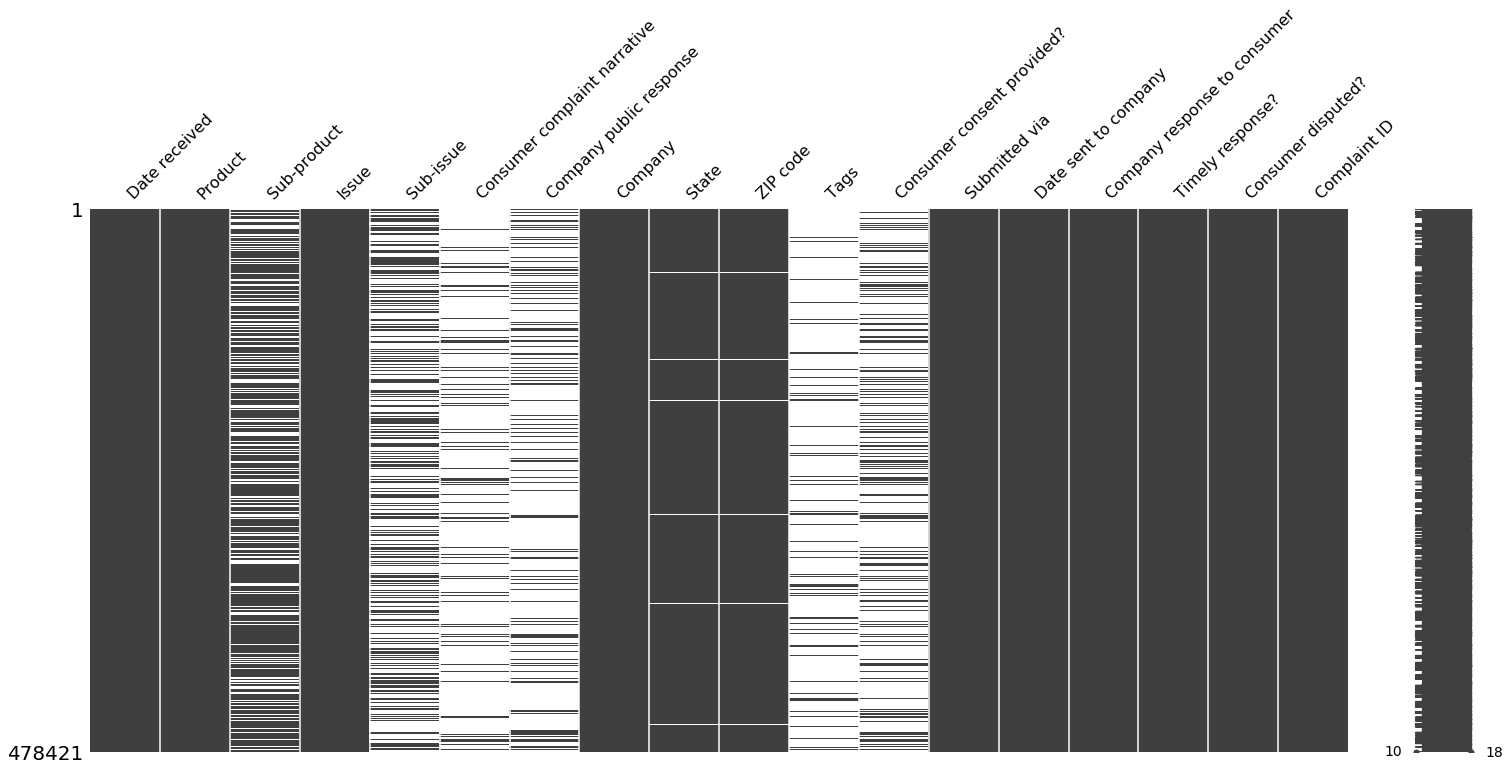

In [10]:
import missingno as msno
msno.matrix(df_train)   #Missing Data - Visualization

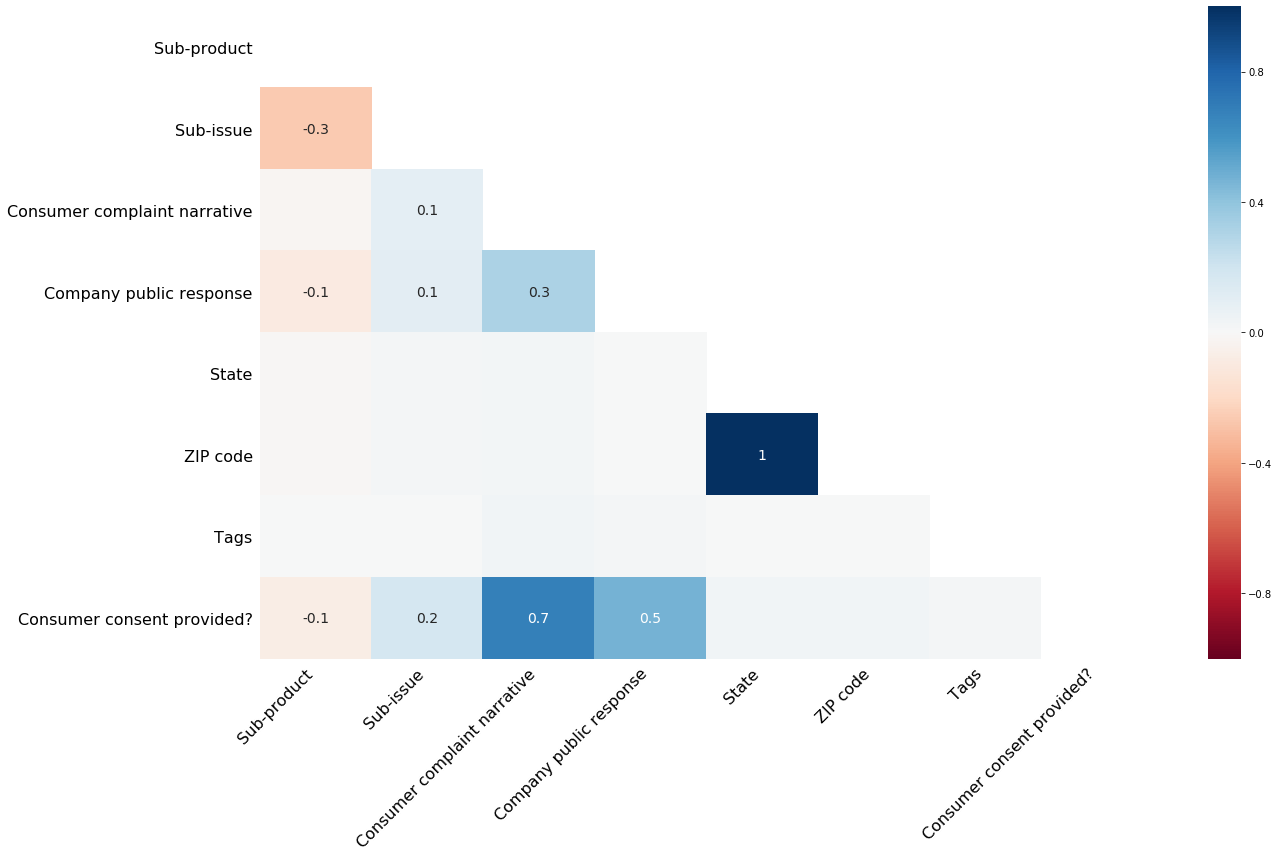

In [11]:
msno.heatmap(df_train)   #Observation:From the visual, we can see that there are many columns are empty

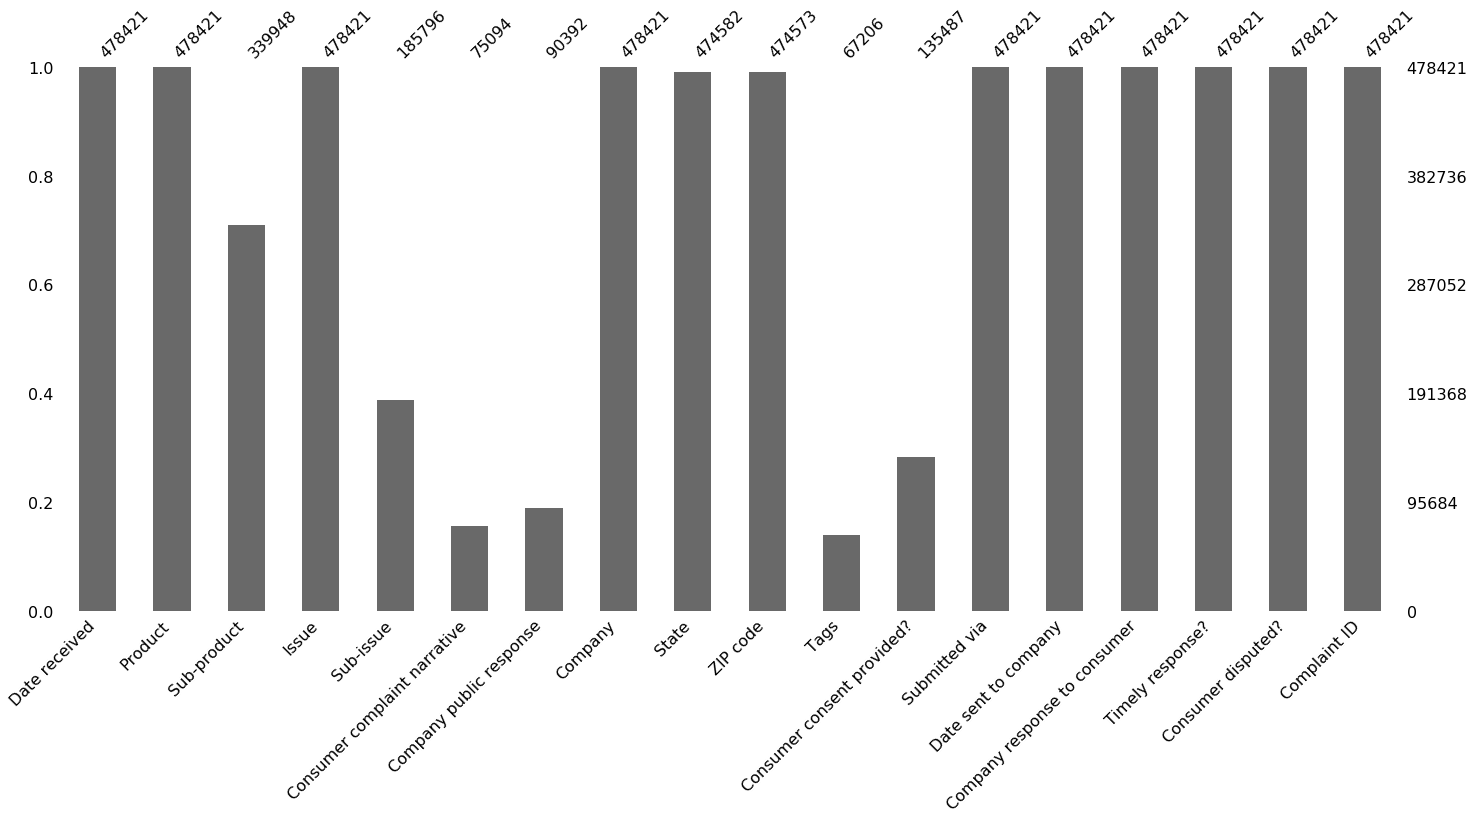

In [12]:
msno.bar(df_train)

In [13]:
df_train.shape[0]  #return the dimension for train dataset

478421

In [14]:
import matplotlib.pyplot as plt
def show_donut_plot(col):
    
    rating_data = df_train.groupby(col)[['Product']].count().head(10)
    plt.figure(figsize = (12, 8))
    plt.pie(rating_data[['Product']], autopct = '%1.0f%%', startangle = 140, pctdistance = 1.1, shadow = True)

    # create a center circle for more aesthetics to make it better
    gap = plt.Circle((0, 0), 0.5, fc = 'white')
    fig = plt.gcf()
    fig.gca().add_artist(gap)
    
    plt.axis('equal')
    
    cols = []
    for index, row in rating_data.iterrows():
        cols.append(index)
    plt.legend(cols)
    
    plt.title('Donut Plot by ' +str(col), loc='center')
    
    plt.show()

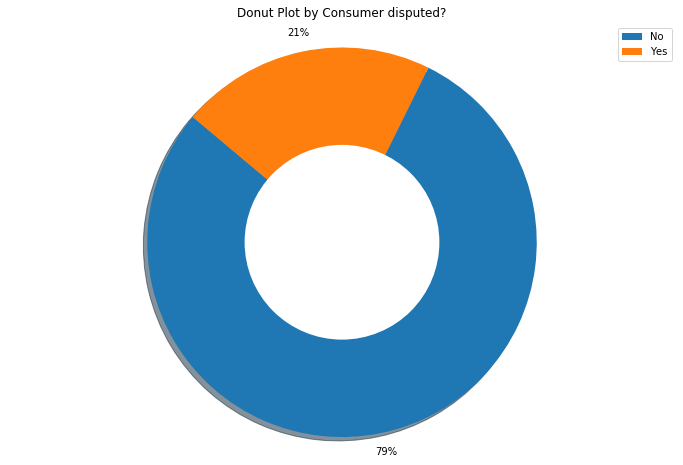

In [15]:
show_donut_plot('Consumer disputed?')  #Let's use donut plots to understand the data better with specific groups like Product

In [16]:
len(df_train['Consumer complaint narrative'].value_counts())   #Return a Series containing counts of unique values.

74019

In [17]:
len(df_train['Consumer complaint narrative'].unique())  #Return a Series containing counts of unique values.

74020

In [18]:
len(df_train['Product'].unique()) #print unique value from produc col

12

In [19]:
#convert data type of datetime, object to datetime
# Use Parameter infer_datetime_format and set it as True
#Passing infer_datetime_format=True can often-times speedup a parsing if its not an ISO8601 format exactly,but in a regular format.
for col in ['Date sent to company','Date received']:
    df_train[col] = pd.to_datetime(df_train[col],infer_datetime_format=True)

In [20]:
df_train.isnull().sum()

Date received                        0
Product                              0
Sub-product                     138473
Issue                                0
Sub-issue                       292625
Consumer complaint narrative    403327
Company public response         388029
Company                              0
State                             3839
ZIP code                          3848
Tags                            411215
Consumer consent provided?      342934
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

In [21]:
#add a new col concat_both for diff. between the Date sent to company & Date received col.
df_train['day_difffrom_Date'] = pd.to_numeric(df_train['Date sent to company'] - df_train['Date received'])

In [22]:
df_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,day_difffrom_Date
0,2014-05-15,Credit card,NaN,Billing statement,NaN,NaN,NaN,Wells Fargo & Company,MI,48342,Older American,NaN,Web,2014-05-16,Closed with explanation,Yes,No,856103,86400000000000
1,2014-09-18,Bank account or service,(CD) Certificate of deposit,"Making/receiving payments, sending money",NaN,NaN,NaN,Santander Bank US,PA,18042,NaN,NaN,Referral,2014-09-24,Closed,Yes,No,1034666,518400000000000
2,2014-03-13,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Equifax,CA,92427,NaN,NaN,Referral,2014-04-03,Closed with non-monetary relief,Yes,No,756363,1814400000000000
3,2015-07-17,Credit card,NaN,Billing statement,NaN,"My credit card statement from US Bank, XXXX. X...",Company chooses not to provide a public response,U.S. Bancorp,GA,305XX,Older American,Consent provided,Web,2015-07-17,Closed with monetary relief,Yes,No,1474177,0
4,2014-11-20,Credit card,NaN,Transaction issue,NaN,NaN,NaN,Bank of America,MA,02127,NaN,NaN,Web,2014-11-28,Closed with explanation,Yes,No,1132572,691200000000000


In [23]:
#drop the Date sent to company & Date received col
for col in ['Date sent to company','Date received']:
    df_train.drop([col],axis=1,inplace=True)

In [24]:
df_train.head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,day_difffrom_Date
0,Credit card,NaN,Billing statement,NaN,NaN,NaN,Wells Fargo & Company,MI,48342,Older American,NaN,Web,Closed with explanation,Yes,No,856103,86400000000000
1,Bank account or service,(CD) Certificate of deposit,"Making/receiving payments, sending money",NaN,NaN,NaN,Santander Bank US,PA,18042,NaN,NaN,Referral,Closed,Yes,No,1034666,518400000000000
2,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Equifax,CA,92427,NaN,NaN,Referral,Closed with non-monetary relief,Yes,No,756363,1814400000000000
3,Credit card,NaN,Billing statement,NaN,"My credit card statement from US Bank, XXXX. X...",Company chooses not to provide a public response,U.S. Bancorp,GA,305XX,Older American,Consent provided,Web,Closed with monetary relief,Yes,No,1474177,0
4,Credit card,NaN,Transaction issue,NaN,NaN,NaN,Bank of America,MA,02127,NaN,NaN,Web,Closed with explanation,Yes,No,1132572,691200000000000


In [25]:
df_train.dtypes

Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
day_difffrom_Date                int64
dtype: object

In [26]:
#print object dtypes col & how many unique value
for col in df_train.select_dtypes(['object']).columns:
    print(col,':',df_train[col].nunique())

Product : 12
Sub-product : 47
Issue : 95
Sub-issue : 68
Consumer complaint narrative : 74019
Company public response : 10
Company : 3276
State : 62
ZIP code : 25962
Tags : 3
Consumer consent provided? : 4
Submitted via : 6
Company response to consumer : 7
Timely response? : 2
Consumer disputed? : 2


In [27]:
for col in ['Company public response','Consumer complaint narrative',
            'Consumer consent provided?','Sub-issue',"Sub-product",'Tags']:
    replace_name = col.replace(' ','_').replace('?','_').replace('-','_') + '_isNaN'  #replace the " "and "?" and "-" with "_"
    df_train[replace_name] = np.where(pd.isnull(df_train[col]),1,0)
    del df_train[col] 

In [28]:
df_train.head()

,Product,Issue,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,day_difffrom_Date,Company_public_response_isNaN,Consumer_complaint_narrative_isNaN,Consumer_consent_provided__isNaN,Sub_issue_isNaN,Sub_product_isNaN,Tags_isNaN
0,Credit card,Billing statement,Wells Fargo & Company,MI,48342,Web,Closed with explanation,Yes,No,856103,86400000000000,1,1,1,1,1,0
1,Bank account or service,"Making/receiving payments, sending money",Santander Bank US,PA,18042,Referral,Closed,Yes,No,1034666,518400000000000,1,1,1,1,0,1
2,Credit reporting,Incorrect information on credit report,Equifax,CA,92427,Referral,Closed with non-monetary relief,Yes,No,756363,1814400000000000,1,1,1,0,1,1
3,Credit card,Billing statement,U.S. Bancorp,GA,305XX,Web,Closed with monetary relief,Yes,No,1474177,0,0,0,0,1,1,0
4,Credit card,Transaction issue,Bank of America,MA,02127,Web,Closed with explanation,Yes,No,1132572,691200000000000,1,1,1,1,1,1


In [29]:
#print object col & how many unique value
for col in df_train.select_dtypes(['object']).columns:
    print(col,":",df_train[col].nunique())

Product : 12
Issue : 95
Company : 3276
State : 62
ZIP code : 25962
Submitted via : 6
Company response to consumer : 7
Timely response? : 2
Consumer disputed? : 2


In [30]:
#Drop ZIP code,Company col lot's of null value is present in the col
for col in ['ZIP code','Company']:
    df_train.drop([col],axis=1,inplace=True)

In [31]:
#where(): Process elements depending on conditions with 0 and 1
df_train['Consumer disputed?'] = np.where(df_train['Consumer disputed?']=='Yes',1,0)  

In [32]:
ise = df_train['Issue'].value_counts()
for val in ise.axes[0][0:10]:  #rearranging the data
    replace_name = 'Issue_'+val.replace(',','_').replace(' ','_') #replace "," and " " with "_"
    df_train[replace_name] = np.where(df_train['Issue']==val,1,0) #apply where cond and convert 1,0

del df_train['Issue']  #delete issue objects in Python

In [33]:
ise =df_train['State'].value_counts()
for val in ise.axes[0][0:10]: #rearranging the data
    replace_name = 'State_'+val.replace(',','_').replace(' ','_')  #replace "," and " " with "_"
    df_train[replace_name] = np.where(df_train['State']==val,1,0) #apply where cond and convert 1,0

del df_train['State'] #delete State objects in Python

In [34]:
for col in ['Product','Submitted via','Company response to consumer','Timely response?']:
    
    temp = pd.get_dummies(df_train[col],prefix=col,drop_first=True)  #use one hot encoding
    df_train = pd.concat([temp,df_train],1)
    df_train.drop([col],1,inplace=True)

In [35]:
df_train.head()

,Timely response?_Yes,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_Untimely response,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,...,State_CA,State_FL,State_TX,State_NY,State_GA,State_NJ,State_PA,State_IL,State_VA,State_MD
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
p=df_train['Consumer disputed?'].value_counts()   #Return a Series containing counts of unique values 
p

0    376990
1    101431
Name: Consumer disputed?, dtype: int64

In [37]:
perc=np.percentile(p,50)  #return the 40th percentile
perc

239210.5

In [38]:
df_train.isnull().sum()

Timely response?_Yes                                            0
Company response to consumer_Closed with explanation            0
Company response to consumer_Closed with monetary relief        0
Company response to consumer_Closed with non-monetary relief    0
Company response to consumer_Closed with relief                 0
Company response to consumer_Closed without relief              0
Company response to consumer_Untimely response                  0
Submitted via_Fax                                               0
Submitted via_Phone                                             0
Submitted via_Postal mail                                       0
Submitted via_Referral                                          0
Submitted via_Web                                               0
Product_Consumer Loan                                           0
Product_Credit card                                             0
Product_Credit reporting                                        0
Product_De

In [39]:
df_train.shape

(478421, 52)

# CLEAN TEST DATA

In [40]:
#Read data from your local path.
#csv file is provided here without path, because its present in the folder where this notebook is present.
#If this file is present in some other path, then pd.read_csv('C:/users/hotel_bookings.csv')
#Path should be of your local file

df_test = pd.read_csv("Consumer_Complaints_test_share.csv")  #read test dataset

In [41]:
#Displaying top 5 values in a dataframe
#for different count like top 10 or 20, etc, --> train.head(10) or train.head(20)
#for last values in dataframe --> train.tail()
df_test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2014-01-18,Bank account or service,Cashing a check without an account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,CA,95691,NaN,NaN,Web,2014-01-17,Closed with explanation,Yes,675956
1,2016-03-31,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt was paid,NaN,NaN,"National Credit Adjusters, LLC",FL,32086,NaN,Consent not provided,Web,2016-03-31,Closed with explanation,Yes,1858795
2,2012-03-08,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,94618,NaN,NaN,Web,2012-03-09,Closed without relief,Yes,32637
3,2016-01-07,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,Company chooses not to provide a public response,"TransUnion Intermediate Holdings, Inc.",FL,33584,Older American,NaN,Postal mail,2016-01-12,Closed with non-monetary relief,Yes,1731374
4,2013-08-23,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,FL,33543,NaN,NaN,Web,2013-08-23,Closed with explanation,Yes,501487


In [42]:
df_test.shape #The shape of an array is the number of elements in each dimension

(119606, 17)

In [43]:
df_test.info() #return information for a function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119606 entries, 0 to 119605
Data columns (total 17 columns):
Date received                   119606 non-null object
Product                         119606 non-null object
Sub-product                     84854 non-null object
Issue                           119606 non-null object
Sub-issue                       46546 non-null object
Consumer complaint narrative    18557 non-null object
Company public response         22776 non-null object
Company                         119606 non-null object
State                           118681 non-null object
ZIP code                        118680 non-null object
Tags                            16871 non-null object
Consumer consent provided?      33864 non-null object
Submitted via                   119605 non-null object
Date sent to company            119606 non-null object
Company response to consumer    119606 non-null object
Timely response?                119606 non-null object
Complaint ID   

In [44]:
df_test.columns  #return all columns from test dataset

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

In [45]:
df_test.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object

In [46]:
#count of null values for specific columns in dataframe
df_test.isna().sum()

Date received                        0
Product                              0
Sub-product                      34752
Issue                                0
Sub-issue                        73060
Consumer complaint narrative    101049
Company public response          96830
Company                              0
State                              925
ZIP code                           926
Tags                            102735
Consumer consent provided?       85742
Submitted via                        1
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Complaint ID                         0
dtype: int64

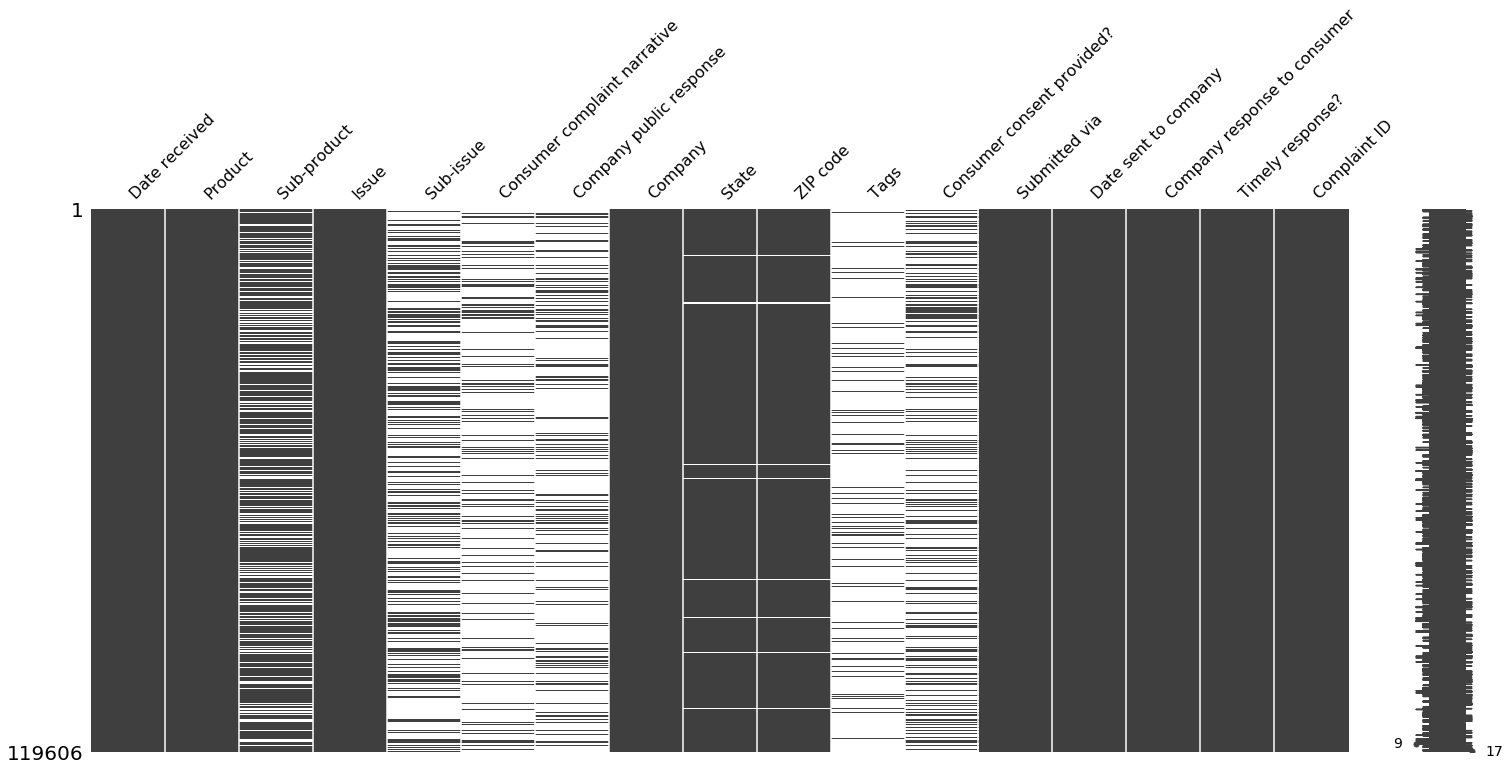

In [47]:
import missingno as msno   #Missing Data - Visualization
msno.matrix(df_test)

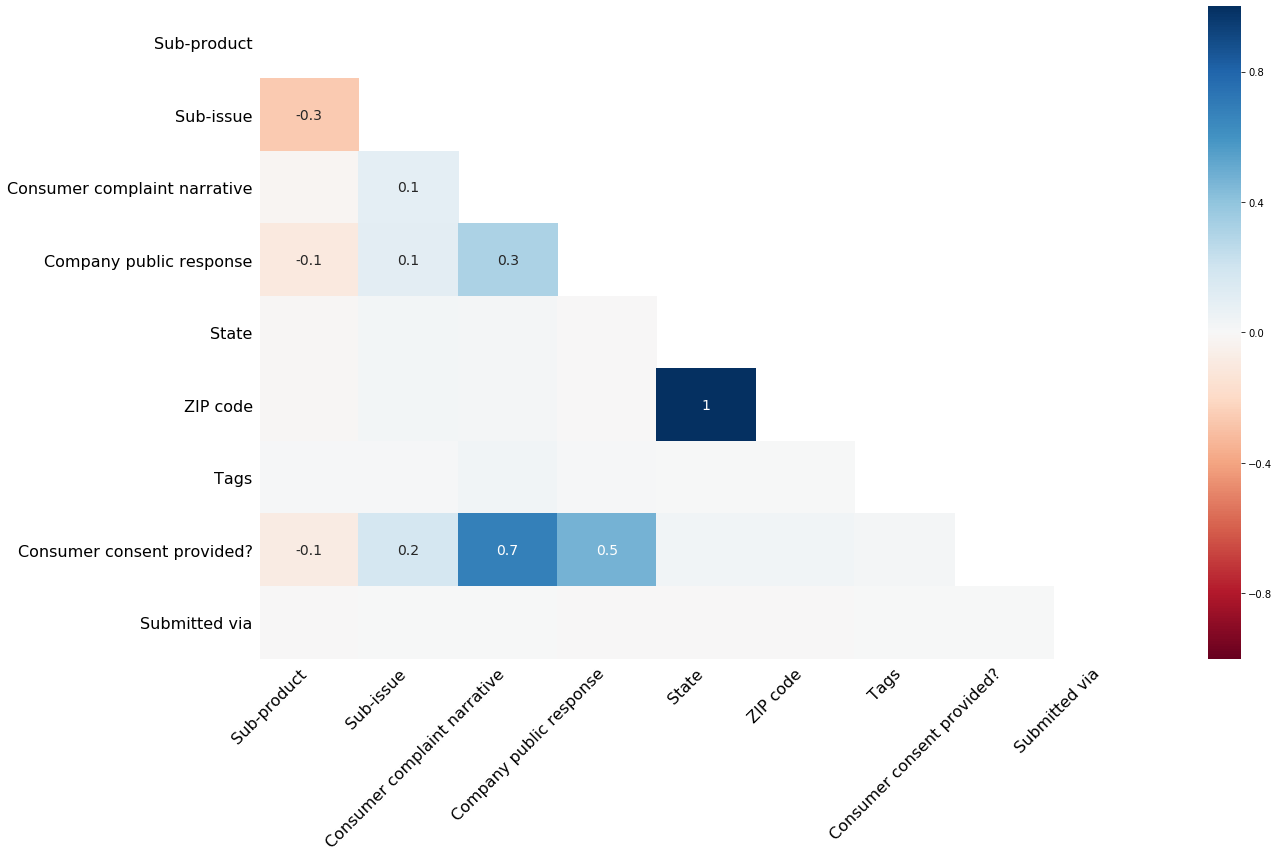

In [48]:
msno.heatmap(df_test)   #Observation:From the visual, we can see that there are many columns are empty

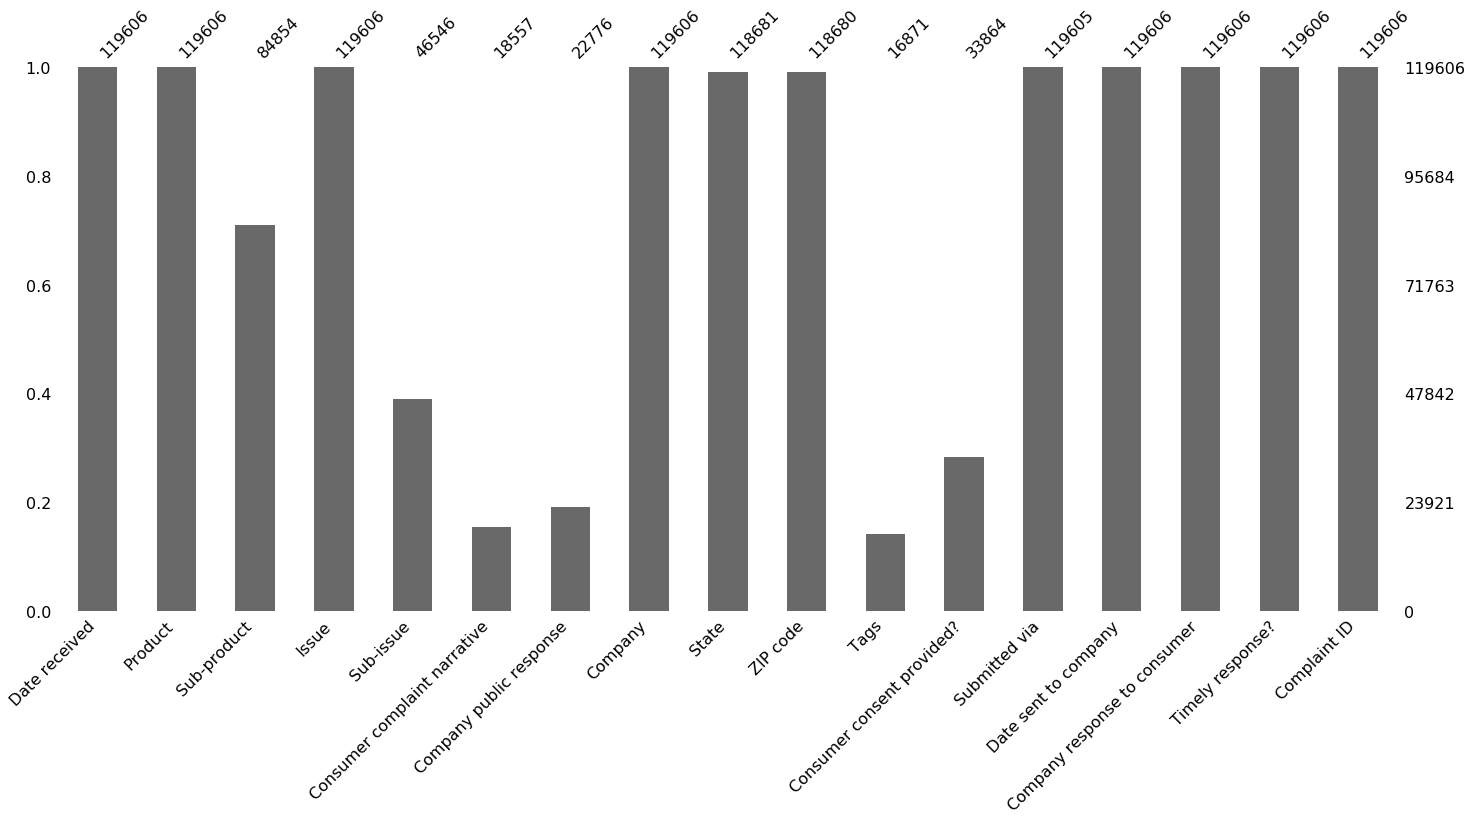

In [49]:
msno.bar(df_test)

In [50]:
df_test['Consumer disputed?'] = np.nan

In [51]:
#convert data type of datetime, object to datetime
# Use Parameter infer_datetime_format and set it as True
#Passing infer_datetime_format=True can often-times speedup a parsing if its not an ISO8601 format exactly,but in a regular format.
for col in ['Date sent to company','Date received']:
    df_test[col] = pd.to_datetime(df_test[col],infer_datetime_format=True)

In [52]:
df_test.isnull().sum()

Date received                        0
Product                              0
Sub-product                      34752
Issue                                0
Sub-issue                        73060
Consumer complaint narrative    101049
Company public response          96830
Company                              0
State                              925
ZIP code                           926
Tags                            102735
Consumer consent provided?       85742
Submitted via                        1
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Complaint ID                         0
Consumer disputed?              119606
dtype: int64

In [53]:
#add a new col concat_both for diff. between the Date sent to company & Date received col.
df_test['day_difffrom_Date'] = pd.to_numeric(df_test['Date sent to company'] - df_test['Date received'])

In [54]:
df_test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Consumer disputed?,day_difffrom_Date
0,2014-01-18,Bank account or service,Cashing a check without an account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,CA,95691,NaN,NaN,Web,2014-01-17,Closed with explanation,Yes,675956,NaN,-86400000000000
1,2016-03-31,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt was paid,NaN,NaN,"National Credit Adjusters, LLC",FL,32086,NaN,Consent not provided,Web,2016-03-31,Closed with explanation,Yes,1858795,NaN,0
2,2012-03-08,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,94618,NaN,NaN,Web,2012-03-09,Closed without relief,Yes,32637,NaN,86400000000000
3,2016-01-07,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,Company chooses not to provide a public response,"TransUnion Intermediate Holdings, Inc.",FL,33584,Older American,NaN,Postal mail,2016-01-12,Closed with non-monetary relief,Yes,1731374,NaN,432000000000000
4,2013-08-23,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,FL,33543,NaN,NaN,Web,2013-08-23,Closed with explanation,Yes,501487,NaN,0


In [55]:
#drop the Date sent to company & Date received col
for col in ['Date sent to company','Date received']:
    df_test.drop([col],axis=1,inplace=True)

In [56]:
df_test.head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Complaint ID,Consumer disputed?,day_difffrom_Date
0,Bank account or service,Cashing a check without an account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,CA,95691,NaN,NaN,Web,Closed with explanation,Yes,675956,NaN,-86400000000000
1,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt was paid,NaN,NaN,"National Credit Adjusters, LLC",FL,32086,NaN,Consent not provided,Web,Closed with explanation,Yes,1858795,NaN,0
2,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,94618,NaN,NaN,Web,Closed without relief,Yes,32637,NaN,86400000000000
3,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,Company chooses not to provide a public response,"TransUnion Intermediate Holdings, Inc.",FL,33584,Older American,NaN,Postal mail,Closed with non-monetary relief,Yes,1731374,NaN,432000000000000
4,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,FL,33543,NaN,NaN,Web,Closed with explanation,Yes,501487,NaN,0


In [57]:
df_test.dtypes

Product                          object
Sub-product                      object
Issue                            object
Sub-issue                        object
Consumer complaint narrative     object
Company public response          object
Company                          object
State                            object
ZIP code                         object
Tags                             object
Consumer consent provided?       object
Submitted via                    object
Company response to consumer     object
Timely response?                 object
Complaint ID                      int64
Consumer disputed?              float64
day_difffrom_Date                 int64
dtype: object

In [58]:
for col in ['Company public response','Consumer complaint narrative',
            'Consumer consent provided?','Sub-issue',"Sub-product",'Tags']:
    replace_name = col.replace(' ','_').replace('?','_').replace('-','_') + '_isNaN'  #replace the " "and "?" and "-" with "_"
    df_test[replace_name] = np.where(pd.isnull(df_test[col]),1,0)
    del df_test[col] 

In [59]:
df_test.head()

,Product,Issue,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Complaint ID,Consumer disputed?,day_difffrom_Date,Company_public_response_isNaN,Consumer_complaint_narrative_isNaN,Consumer_consent_provided__isNaN,Sub_issue_isNaN,Sub_product_isNaN,Tags_isNaN
0,Bank account or service,Deposits and withdrawals,Bank of America,CA,95691,Web,Closed with explanation,Yes,675956,NaN,-86400000000000,1,1,1,1,0,1
1,Debt collection,Cont'd attempts collect debt not owed,"National Credit Adjusters, LLC",FL,32086,Web,Closed with explanation,Yes,1858795,NaN,0,1,1,0,0,0,1
2,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,94618,Web,Closed without relief,Yes,32637,NaN,86400000000000,1,1,1,1,0,1
3,Credit reporting,Unable to get credit report/credit score,"TransUnion Intermediate Holdings, Inc.",FL,33584,Postal mail,Closed with non-monetary relief,Yes,1731374,NaN,432000000000000,0,1,1,0,1,0
4,Mortgage,"Loan modification,collection,foreclosure",Bank of America,FL,33543,Web,Closed with explanation,Yes,501487,NaN,0,1,1,1,1,0,1


In [60]:
#print object col & how many unique value
for col in df_test.select_dtypes(['object']).columns:
    print(col,":",df_test[col].nunique())

Product : 12
Issue : 94
Company : 2237
State : 62
ZIP code : 17784
Submitted via : 6
Company response to consumer : 7
Timely response? : 2


In [61]:
#Drop ZIP code,Company col lot's of null value is present in the col
for col in ['ZIP code','Company']:
    df_test.drop([col],axis=1,inplace=True)

In [62]:
#where(): Process elements depending on conditions with 0 and 1
df_test['Consumer disputed?'] = np.where(df_test['Consumer disputed?']=='Yes',1,0)  

In [63]:
ise = df_test['Issue'].value_counts()
for val in ise.axes[0][0:10]:  #rearranging the data
    replace_name = 'Issue_'+val.replace(',','_').replace(' ','_') #replace "," and " " with "_"
    df_test[replace_name] = np.where(df_test['Issue']==val,1,0) #apply where cond and convert 1,0

del df_test['Issue']  #delete issue objects in Python

In [64]:
ise = df_test['State'].value_counts()
for val in ise.axes[0][0:10]: #rearranging the data
    replace_name = 'State_'+val.replace(',','_').replace(' ','_')  #replace "," and " " with "_"
    df_test[replace_name] = np.where(df_test['State']==val,1,0) #apply where cond and convert 1,0

del df_test['State'] #delete State objects in Python

In [65]:
for col in ['Product','Submitted via','Company response to consumer','Timely response?']:
    
    temp = pd.get_dummies(df_test[col],prefix=col,drop_first=True)  #use one hot encoding
    df_test = pd.concat([temp,df_test],1)
    df_test.drop([col],1,inplace=True)

In [66]:
df_test.head()

,Timely response?_Yes,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_Untimely response,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,...,State_CA,State_FL,State_TX,State_NY,State_GA,State_NJ,State_PA,State_IL,State_VA,State_OH
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [67]:
p=df_test['Consumer disputed?'].value_counts()   #Return a Series containing counts of unique values 
p

0    119606
Name: Consumer disputed?, dtype: int64

In [68]:
perc=np.percentile(p,50)  #return the 40th percentile
perc

119606.0

In [69]:
df_test.isnull().sum()

Timely response?_Yes                                            0
Company response to consumer_Closed with explanation            0
Company response to consumer_Closed with monetary relief        0
Company response to consumer_Closed with non-monetary relief    0
Company response to consumer_Closed with relief                 0
Company response to consumer_Closed without relief              0
Company response to consumer_Untimely response                  0
Submitted via_Fax                                               0
Submitted via_Phone                                             0
Submitted via_Postal mail                                       0
Submitted via_Referral                                          0
Submitted via_Web                                               0
Product_Consumer Loan                                           0
Product_Credit card                                             0
Product_Credit reporting                                        0
Product_De

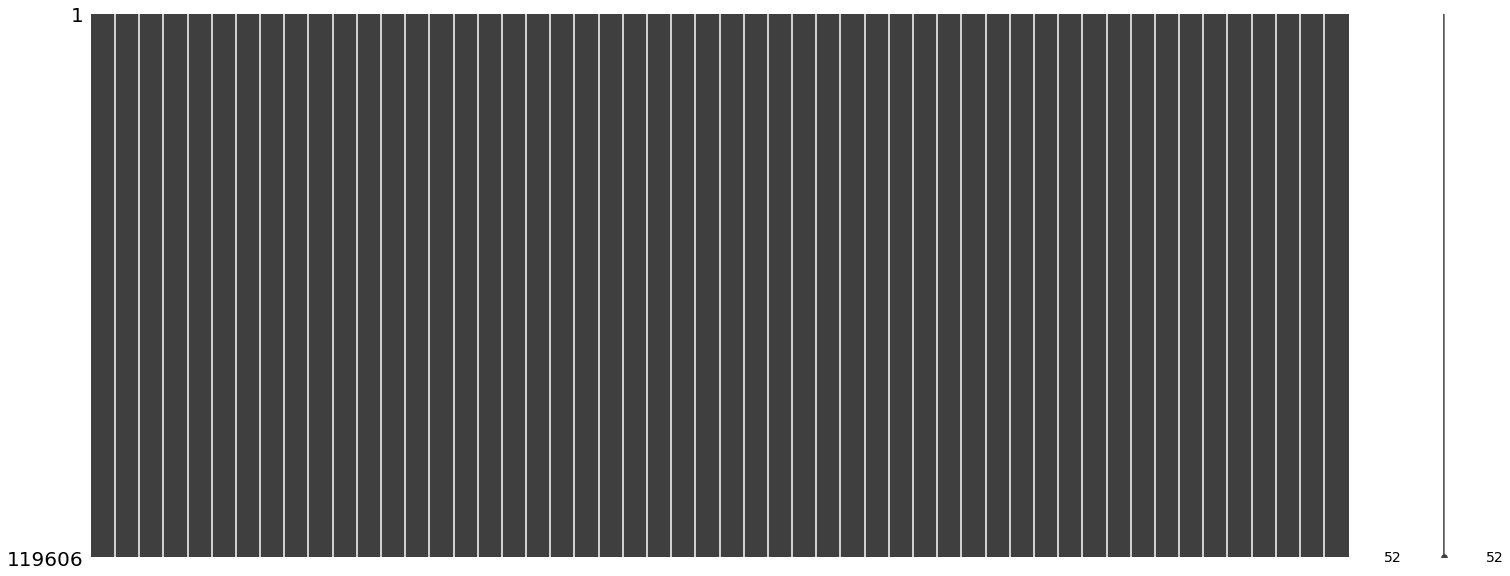

In [70]:
msno.matrix(df_test)   #Missing Data - Visualization

In [71]:
df_test.shape

(119606, 52)

In [72]:
df_train.shape

(478421, 52)

In [73]:
# separate dependent & independent features
x = df_train.drop(['Consumer disputed?'],1)
y = df_train['Consumer disputed?']

x.shape, y.shape

((478421, 51), (478421,))

# Splitting Dataset & Model Building

In [74]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=124)

In [75]:
#Dimensions of each type after splitting
print (x.shape)
print (y.shape)
print (xtrain.shape)
print (xtest.shape)
print (ytrain.shape)
print (ytest.shape)

(478421, 51)
(478421,)
(358815, 51)
(119606, 51)
(358815,)
(119606,)


In [76]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
y_pred=logreg.predict(xtest)

In [78]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_pred)
cm

array([[93272,  1106],
       [24917,   311]], dtype=int64)

([<matplotlib.axis.YTick at 0x1c50e272550>,
 <a list of 2 Text yticklabel objects>)

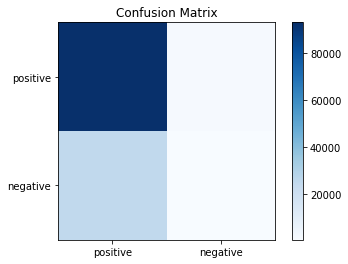

In [79]:

plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
labels=['positive','negative']
tick_marks=np.arange(len(labels))
plt.xticks(tick_marks,labels)
plt.yticks(tick_marks,labels)

In [80]:
from sklearn.metrics import accuracy_score
score=accuracy_score(ytest,y_pred)
score

0.7824273029781115

# Cross validate your model

In [81]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logreg,x,y,cv=10)

In [82]:
score

array([0.78138913, 0.78165629, 0.78146817, 0.78117554, 0.78048577,
       0.78171899, 0.7818235 , 0.78245057, 0.78115463, 0.78157268])

In [83]:
score.mean()

0.7814895251261926

# USE MACHINE LEARNING MODEL ALG.

# Hyperparameter Tuning

A Hyperparameter is a parameter whose value is se before the learning process begins.

Tuning Strategies
1) Grid Search
2) Random Search

# DecisionTreeClassifier 

In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
# Setup the parameters and distributions to sample from: params
# this here is the base classifier we are going to try
# we will be supplying different parameter ranges to our randomSearchCV which in turn
# will pass it on to this classifier

# Utility function to report best scores. This simply accepts grid scores from 
# our randomSearchCV/GridSearchCV and picks and gives top few combination according to 
# their scores

# RandomSearchCV/GridSearchCV accept parameters values as dictionaries.
# In example given below we have constructed dictionary for 
#different parameter values that we want to
# try for randomForest model

params={ 'class_weight':[None,'balanced'], 
        'criterion':['entropy','gini'],
        'max_depth':[None,5,10,15,20,30,50,70],
            'min_samples_leaf':[1,2,5,10,15,20], 
            'min_samples_split':[2,5,10,15,20]}

In [87]:
2*2*8*6*5

960

In [88]:
# Instantiate a Decision Tree classifier: tree
clf=DecisionTreeClassifier()

In [89]:
# Instantiate the RandomizedSearchCV object: random_search
# n_iter parameter of RandomizedSeacrhCV controls, how many 
# parameter combination will be tried; out of all possible given values
random_search=RandomizedSearchCV(clf,cv=10,  #cv=cross-validation
                                 param_distributions=params,    #Dictionary with parameters names as keys and distributions 
                                 scoring='roc_auc', #Strategy to evaluate the performance
                                 n_iter=20,n_jobs=-1,verbose=20)   #Number of parameter settings that are sampled

In [90]:
random_search.fit(xtrain,ytrain)  # Fit it to the data

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  2

[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  9.7min
[Paralle

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [91]:
# Print the tuned parameters and score
def report(results, n_top=3):
    for i in range(1,n_top+1):
        candidates = np.flatnonzero(results['rank_test_score']== i)
        
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean Validation Score: {0:.8f} (std:{1:.3f})'.format(
                    results['mean_test_score'][candidate],
                    results['std_test_score'][candidate]))
            print("Parameters:{0}".format(results['params'][candidate]))
            print("")

In [92]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean Validation Score: 0.62300839 (std:0.003)
Parameters:{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 15, 'criterion': 'entropy', 'class_weight': None}

Model with rank: 2
Mean Validation Score: 0.62284237 (std:0.003)
Parameters:{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 15, 'criterion': 'entropy', 'class_weight': None}

Model with rank: 3
Mean Validation Score: 0.62257882 (std:0.003)
Parameters:{'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 15, 'criterion': 'entropy', 'class_weight': 'balanced'}

Model with rank: 4
Mean Validation Score: 0.61452079 (std:0.003)
Parameters:{'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini', 'class_weight': 'balanced'}

Model with rank: 5
Mean Validation Score: 0.61389049 (std:0.003)
Parameters:{'min_samples_split': 2, 'min_samples_leaf': 15, 'max_depth': 5, 'criterion': 'gini', 'class_weight': None}



In [93]:
#contains the information ofthe best model
random_search.best_estimator_    #print best best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [94]:
dtree=random_search.best_estimator_

In [95]:
#Fit a model on the train data.
dtree.fit(xtrain,ytrain)   # Fit it to the data

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [96]:
#Predict probabilities for the train data.
dtree.predict_proba(xtrain)

array([[0.88625304, 0.11374696],
       [0.66785291, 0.33214709],
       [0.79128137, 0.20871863],
       ...,
       [0.77781513, 0.22218487],
       [0.73083475, 0.26916525],
       [0.80983847, 0.19016153]])

In [97]:
dtree.classes_

array([0, 1])

In [98]:
#Keep Probabilities of the positive class only.
train_score=dtree.predict_proba(xtrain)[:,1] 
train_score

array([0.11374696, 0.33214709, 0.20871863, ..., 0.22218487, 0.26916525,
       0.19016153])

In [99]:
actual = ytrain

In [100]:
cutoffs = np.linspace(0.01,0.99,99)
cutoffs

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [101]:

conf_mat =[]
for cutoff in cutoffs:
    
    predicted = (train_score > cutoff).astype(int)
    
    True_Positive = ((actual==1)&(predicted==1)).sum() #The model predicted the positive class correctly, to be a positive class.
    False_Positive= ((actual==0) &(predicted==1)).sum()#The model predicted the negative class incorrectly, to be a positive class.
    True_Negative = ((actual==0)&(predicted==0)).sum() #The model predicted the positive class incorrectly, to be the negative class.
    False_Negative = ((actual==1)&(predicted==0)).sum() #The model predicted the negative class correctly, to be the negative class.
    
    
    P = True_Positive+False_Negative
    N = True_Negative+False_Positive
    #Recall: Out of all the positive classes, how many instances were identified correctly.
    #Recall = TP / (TP + FN)
    
    #Precision: Out of all the predicted positive instances, how many were predicted correctly.
    #Precision = TP / (TP + FP)
    KS = (True_Positive/P)-(False_Positive/N)  #sensitity(TPR)-fullout(FPR)
    
    conf_mat.append(KS)

In [102]:
mycutoff = cutoffs[conf_mat==max(conf_mat)][0]
mycutoff

0.21000000000000002

In [103]:
test_score=dtree.predict_proba(xtest)[:,1]
test_score

array([0.19355157, 0.13333333, 0.26214354, ..., 0.15130024, 0.26214354,
       0.20220588])

In [104]:
test_classes = (test_score>mycutoff).astype(int)
test_classes

array([0, 0, 1, ..., 0, 1, 0])

AUC–ROC curve is the model selection metric for bi–multi class classification problem. ROC is a probability curve for different classes. ROC tells us how good the model is for distinguishing the given classes, in terms of the predicted probability.

A typical ROC curve has False Positive Rate (FPR) on the X-axis and True Positive Rate (TPR) on the Y-axis.



In [105]:
from sklearn.metrics import roc_auc_score

In [106]:
#Compute the AUC Score.
score = roc_auc_score(ytest,test_classes)
print('AUC: %.2f' % score)

AUC: 0.59


In [107]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [108]:
#Defining a python function to plot the ROC curves.

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [109]:
#Get the ROC Curve.
fpr, tpr, thresholds = roc_curve(ytest, test_classes)

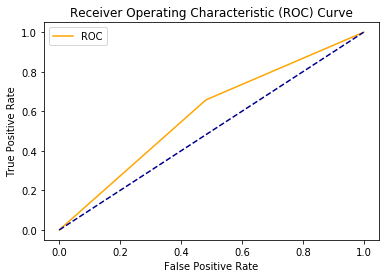

In [110]:
#Plot ROC Curve using our defined function
plot_roc_curve(fpr, tpr)

# Boosting Machines


In [111]:
base_clf=DecisionTreeClassifier(max_leaf_nodes=4,class_weight='balanced')

In [112]:
from sklearn.ensemble import AdaBoostClassifier

In [113]:
adb_params={'n_estimators':[50,100,500],
           'learning_rate': [0.01,.1,1]
           }
adb=AdaBoostClassifier(base_estimator=base_clf)

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
complete_search=GridSearchCV(adb,scoring='roc_auc',param_grid=adb_params,cv=5,n_jobs=-1,verbose=20)

In [116]:
complete_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed: 40

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=4,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                             

In [117]:
def report(results,n_top=5):
    for i in range(1,n_top+1):
        cands = np.flatnonzero(results['rank_test_score']==i)
        for c in cands:
            print(f"Model with rank {i}")
            print(f"Mean validation score:{results['mean_test_score'][c]} (std:{results['std_test_score'][c]})")
            print(f"Parameters:{results['params'][c]}")
            print(' ')
                  

In [118]:
report(complete_search.cv_results_,5)

Model with rank 1
Mean validation score:0.6344609710211054 (std:0.00157135281469795)
Parameters:{'learning_rate': 0.1, 'n_estimators': 500}
 
Model with rank 2
Mean validation score:0.6326051598020468 (std:0.001475931772230084)
Parameters:{'learning_rate': 1, 'n_estimators': 100}
 
Model with rank 3
Mean validation score:0.6323452143233623 (std:0.0014283028811131655)
Parameters:{'learning_rate': 1, 'n_estimators': 50}
 
Model with rank 4
Mean validation score:0.6278121352499805 (std:0.0019143991277173558)
Parameters:{'learning_rate': 0.1, 'n_estimators': 100}
 
Model with rank 5
Mean validation score:0.6265495573832991 (std:0.0017760573780448159)
Parameters:{'learning_rate': 1, 'n_estimators': 500}
 


In [119]:
complete_search.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=4,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                       

In [197]:
adb_best = complete_search.best_estimator_

In [211]:
#Fit a model on the train data.
adb_best.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=4,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                       

In [212]:
#Predict probabilities for the test data.
#Keep Probabilities of the positive class only.
pred = adb_best.predict_proba(xtest)[:,1]

In [213]:
adb_best.classes_

array([0, 1])

In [214]:
#Import libraries
from sklearn.metrics import roc_auc_score

In [215]:
#Compute the AUC Score.
score=roc_auc_score(ytest,pred)
print('AUC: %.2f' % score)

AUC: 0.63


In [216]:
#Get the ROC Curve.
fpr, tpr, thresholds = roc_curve(ytest, pred)

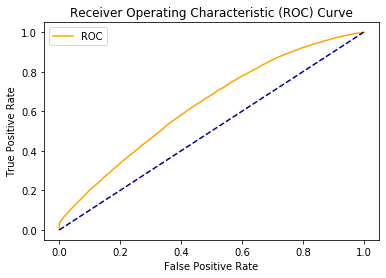

In [217]:
#Plot ROC Curve using our defined function
plot_roc_curve(fpr, tpr)

# Task2: Update the existing notebook to improve the performance

In [218]:
submission=pd.DataFrame(list(zip(df_test['Complaint ID'],list(test_classes))),
                       columns=['Complaint ID','Consumer disputed?'])

In [219]:
submission['Consumer disputed?'].value_counts()

1    62060
0    57546
Name: Consumer disputed?, dtype: int64

In [220]:
submission.to_csv('submission_final.csv',index=False)

In [221]:
df_train['Consumer disputed?'].value_counts()

0    376990
1    101431
Name: Consumer disputed?, dtype: int64

In [222]:
submission.head(20)

,Complaint ID,Consumer disputed?
0,675956,0
1,1858795,0
2,32637,1
3,1731374,0
4,501487,1
5,631565,0
6,1283963,1
7,1902970,0
8,1160691,0
9,359929,0
